In [69]:
###### import numpy as np
import pandas as pd
import os
import glob
from astropy.io import fits
#import emcee
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.time import Time
import lightkurve as lk
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_context('paper')

from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [70]:
df_mcmc = pd.read_csv('C:/Users/jojoa/GitHub/disperse/data/preliminary_results_He.csv')
df_muler = pd.read_csv("C:/Users/jojoa/GitHub/blimp/data/tables/muler_results_He.csv")

In [71]:
pd.set_option('display.max_rows', None)  

Merge MCMC and muler dataframes. We merged on the same key named 'real_date' and we transformed the string date to a datetime object.

In [72]:
df_mcmc.tail()

,date,ew,ew_unc,gaussian_width,gaussian_width_unc,int_wv,jd,obs_line_center,obs_line_center_unc,qidx,star_name,time
94,2/1/2021,0.440921,0.006403,0.950946,0.013725,10830,2459247.025,10829.80784,0.014173,8486,hat-p-67b,12:36:08
95,2/26/2021,0.460999,0.010083,1.000522,0.023499,10830,2459271.936,10829.79765,0.022085,8486,hat-p-67b,10:28:30
96,2/26/2021,0.467579,0.009399,1.017283,0.023066,10830,2459271.943,10829.76492,0.019399,8486,hat-p-67b,10:37:34
97,3/4/2021,0.298803,0.007327,0.757333,0.019325,10830,2459277.929,10829.61106,0.019732,8486,hat-p-67b,10:18:26
98,3/4/2021,0.283490,0.006253,0.697434,0.016616,10830,2459277.936,10829.60018,0.016479,8486,hat-p-67b,10:27:30


In [73]:
df_muler.tail()

,night_of,in_transit,OBJECT,ITIME,snr,Path,ew
16,2021-01-30,False,hat-p-67b,1022.4,65.535136,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,0.217604
17,2021-01-31,False,hat-p-67b,1022.4,112.769287,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,0.111115
18,2021-02-23,False,hat-p-67b,511.2,64.109442,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,0.174671
19,2021-02-25,False,hat-p-67b,1022.4,83.099733,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,0.111566
20,2021-03-03,False,hat-p-67b,1022.4,92.562054,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,0.056418


In [74]:
df_muler['real_date']=pd.to_datetime(df_muler.night_of)

In [75]:
df_mcmc['real_date']=pd.to_datetime(df_mcmc.date)

In [76]:
df = pd.merge(df_mcmc,df_muler,on='real_date',suffixes=('_mcmc','_muler'))
df
#nights repeat for muler bc sorted by night not individually

,date,ew_mcmc,ew_unc,gaussian_width,gaussian_width_unc,int_wv,jd,obs_line_center,obs_line_center_unc,qidx,star_name,time,real_date,night_of,in_transit,OBJECT,ITIME,snr,Path,ew_muler
0,4/28/2020,0.321303,0.012598,0.791798,0.034299,10830,2458967.757,10829.96395,0.033709,6437,HAT-P-67b_IN_1,6:10:31,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,0.141262
1,4/28/2020,0.341680,0.016330,0.801452,0.039125,10830,2458967.761,10829.95732,0.041642,6437,HAT-P-67b_IN_1,6:16:12,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,0.141262
2,4/28/2020,0.380583,0.018648,0.797788,0.039206,10830,2458967.765,10830.04742,0.044027,6437,HAT-P-67b_IN_1,6:21:53,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,0.141262
3,4/28/2020,0.341721,0.013034,0.761265,0.030886,10830,2458967.769,10829.85362,0.031517,6437,HAT-P-67b_IN_1,6:27:34,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,0.141262
4,4/28/2020,1.055947,0.490253,3.140694,1.498257,10830,2458967.773,10831.88348,1.250571,6437,HAT-P-67b_IN_1,6:33:15,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,0.141262
5,4/28/2020,0.322965,0.009108,0.796197,0.025362,10830,2458967.777,10829.98813,0.023606,6437,HAT-P-67b_IN_1,6:38:57,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,0.141262
6,4/28/2020,0.308050,0.007363,0.772279,0.021190,10830,2458967.781,10829.93534,0.019670,6437,HAT-P-67b_IN_1,6:44:38,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,0.141262
7,4/28/2020,0.335687,0.008161,0.847920,0.024370,10830,2458967.785,10830.00060,0.020668,6437,HAT-P-67b_IN_1,6:50:19,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,0.141262
8,4/28/2020,0.319466,0.007658,0.809898,0.023400,10830,2458967.789,10829.97309,0.020252,6437,HAT-P-67b_IN_1,6:56:00,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,0.141262
9,4/28/2020,0.332024,0.008627,0.842567,0.026619,10830,2458967.793,10829.96892,0.022425,6437,HAT-P-67b_IN_1,7:01:41,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,0.141262


We now have one dataframe!

In [77]:
df['ew'] = df['ew_muler']

In [78]:
df_bool=df['ew']<0

In [79]:
df['ew'].mean()

0.1646460841970964

In [80]:
(df.date.value_counts())

6/15/2020    18
4/28/2020    14
5/22/2020    14
6/14/2020     8
4/27/2020     4
5/21/2020     4
5/20/2020     4
5/23/2020     4
6/13/2020     3
1/31/2021     2
Name: date, dtype: int64

In [81]:
df.star_name.value_counts()

HAT-P-67b_IN_2             14
HAT-P-67b_IN_1             14
HAT-P-67b_OUT_same3         9
HAT-P-67b_IN_3              9
HAT-P-67b_OUT_3_before1     8
HAT-P-67b_OUT_2_after1      4
HAT-P-67b_OUT_1_before1     4
HAT-P-67b_OUT_2_before2     4
HAT-P-67b_OUT_2_before1     4
HAT-P-67b_OUT_3_before2     3
hat-p-67b                   2
Name: star_name, dtype: int64

We retrieved the data for the planets from [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/)

In [82]:
target_name = 'HAT-P-67b'
orbital_period = 4.81010250
t_c = 2455961.38467
t_c_btjd = t_c-2457000.0 #neg value means discovered before TESS

In [83]:
target_mask = df.star_name.str.contains(target_name)
df = df[target_mask]
keep_mask = df.ew_unc < 10 #original value = 1

In [84]:
df

,date,ew_mcmc,ew_unc,gaussian_width,gaussian_width_unc,int_wv,jd,obs_line_center,obs_line_center_unc,qidx,...,time,real_date,night_of,in_transit,OBJECT,ITIME,snr,Path,ew_muler,ew
0,4/28/2020,0.321303,0.012598,0.791798,0.034299,10830,2458967.757,10829.96395,0.033709,6437,...,6:10:31,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,0.141262,0.141262
1,4/28/2020,0.341680,0.016330,0.801452,0.039125,10830,2458967.761,10829.95732,0.041642,6437,...,6:16:12,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,0.141262,0.141262
2,4/28/2020,0.380583,0.018648,0.797788,0.039206,10830,2458967.765,10830.04742,0.044027,6437,...,6:21:53,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,0.141262,0.141262
3,4/28/2020,0.341721,0.013034,0.761265,0.030886,10830,2458967.769,10829.85362,0.031517,6437,...,6:27:34,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,0.141262,0.141262
4,4/28/2020,1.055947,0.490253,3.140694,1.498257,10830,2458967.773,10831.88348,1.250571,6437,...,6:33:15,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,0.141262,0.141262
5,4/28/2020,0.322965,0.009108,0.796197,0.025362,10830,2458967.777,10829.98813,0.023606,6437,...,6:38:57,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,0.141262,0.141262
6,4/28/2020,0.308050,0.007363,0.772279,0.021190,10830,2458967.781,10829.93534,0.019670,6437,...,6:44:38,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,0.141262,0.141262
7,4/28/2020,0.335687,0.008161,0.847920,0.024370,10830,2458967.785,10830.00060,0.020668,6437,...,6:50:19,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,0.141262,0.141262
8,4/28/2020,0.319466,0.007658,0.809898,0.023400,10830,2458967.789,10829.97309,0.020252,6437,...,6:56:00,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,0.141262,0.141262
9,4/28/2020,0.332024,0.008627,0.842567,0.026619,10830,2458967.793,10829.96892,0.022425,6437,...,7:01:41,2020-04-28,2020-04-28,False,HAT-P-67b_OUT_1_after1,1235.40,102.062307,['C:/Users/jojoa/GitHub/disperse/data/HPF/Heli...,0.141262,0.141262


In [85]:
df = df[keep_mask]
in_transit_mask = df.star_name.str.contains('_IN')

In [86]:
df['ew']=df.ew.astype(np.float).values #change str to float
df['btjd']=df['jd']-2457000.0 #cut down JD to smaller scale

In [87]:
sn_ratio=2
good_data_mask=(df.ew/df.ew_unc)>sn_ratio #signal to noise ratio

In [88]:
df=df[good_data_mask]

In [89]:
x_line=df['ew'].median() #calculate horizontal line going between in/out of transit points
x_line

0.1412619581442049

Text(0, 0.5, 'Equivalent Width ($\\AA$)')

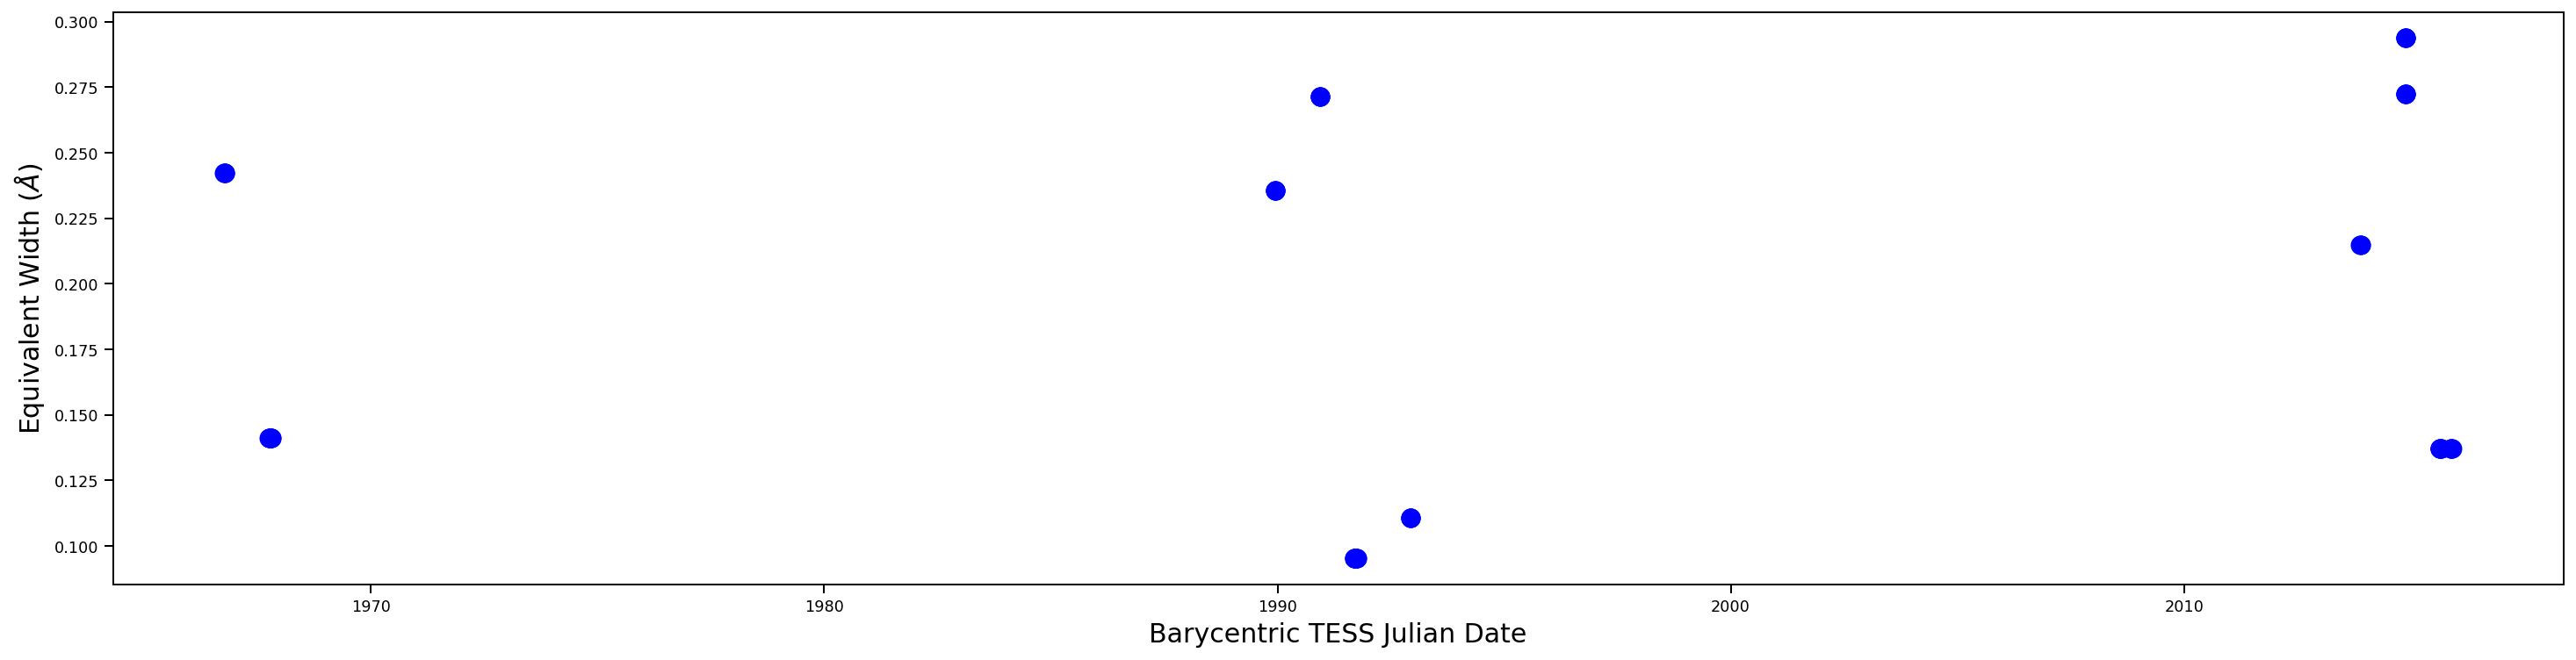

In [90]:
plt.figure(figsize=(25,6))
#plt.errorbar(df.btjd, df.ew, yerr=df.ew_unc, fmt='b.')
plt.plot(df.btjd, df.ew, 'bo', markersize=10)
plt.xlabel('Barycentric TESS Julian Date', fontsize=15)
plt.ylabel('Equivalent Width ($\AA$)', fontsize=15)

Text(0, 0.5, 'Equivalent Width ($\\AA$)')

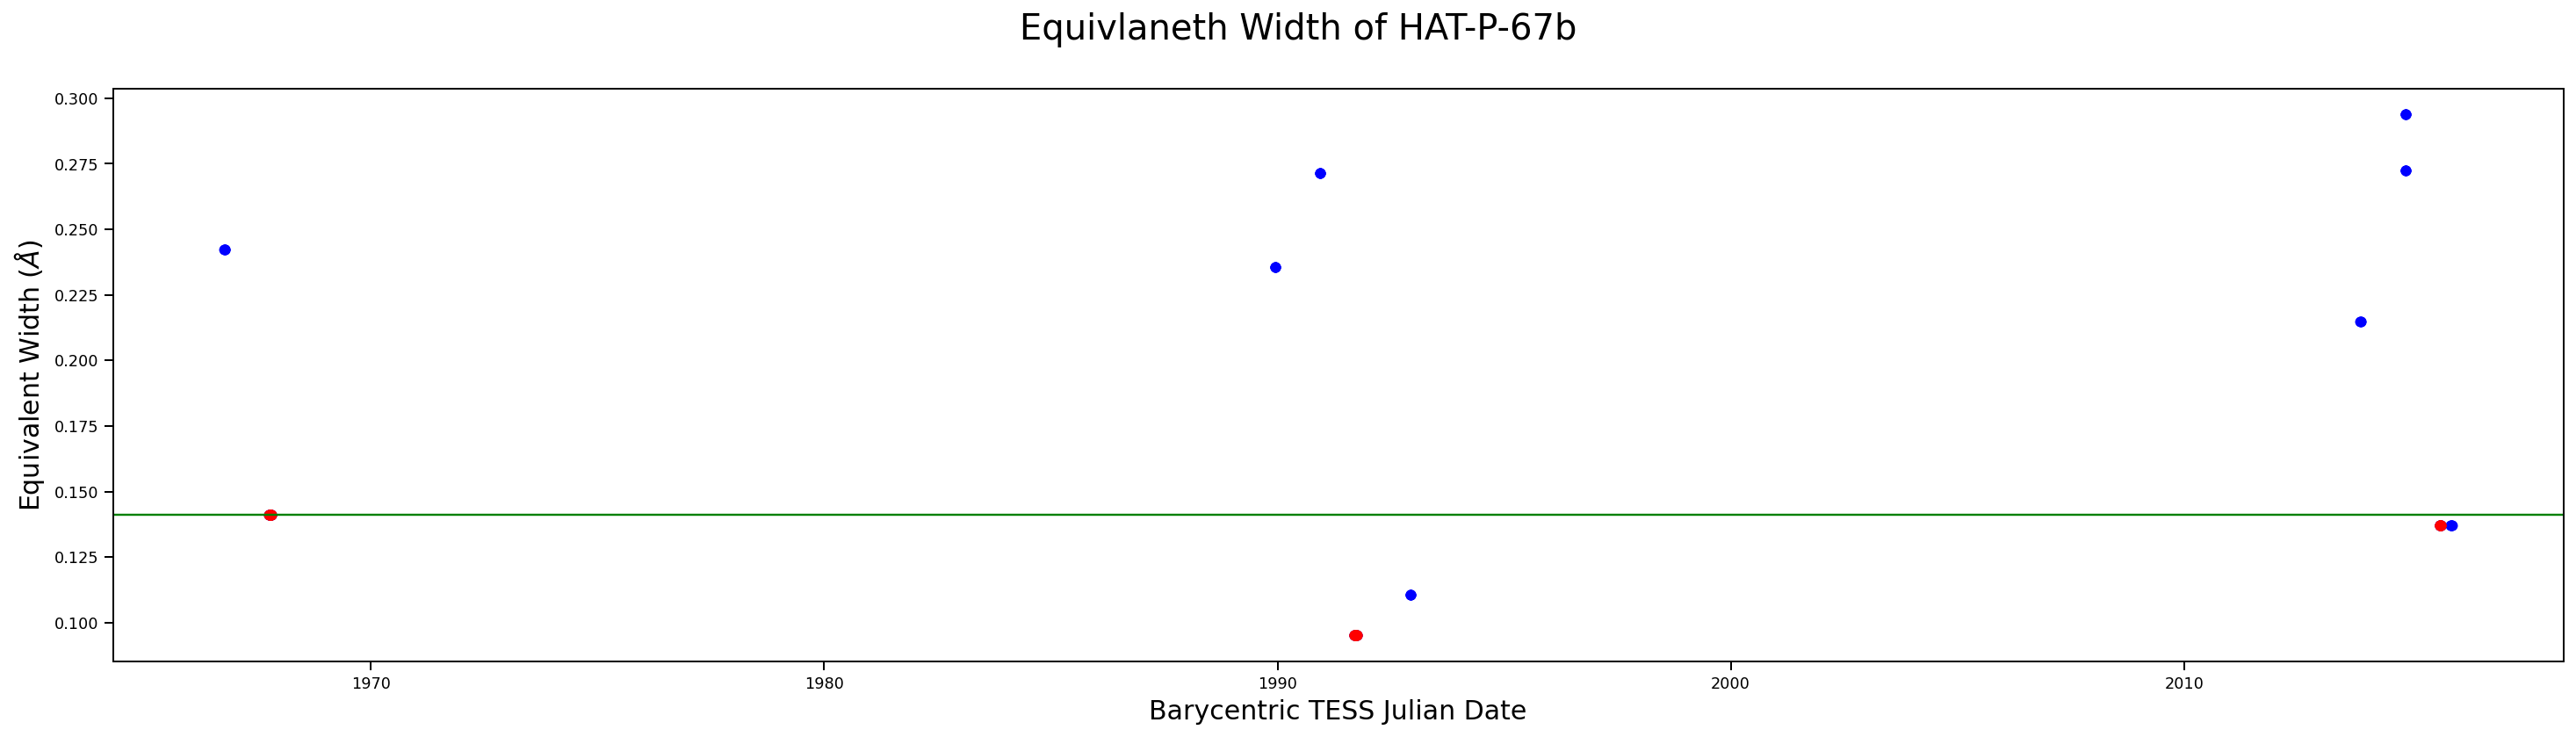

In [91]:
plt.figure(figsize=(25,6))
#plt.errorbar(df.btjd, df.ew, yerr=df.ew_unc, fmt='b.')
plt.plot(df.btjd, df.ew, 'bo', markersize=5)
plt.plot(df.btjd[in_transit_mask], df.ew[in_transit_mask],'ro',markersize=5) #change index to jd for time
#plt.ylim(0)
plt.axhline(x_line,color = 'green')
plt.suptitle(f'Equivlaneth Width of {target_name}', fontsize=20)
plt.xlabel('Barycentric TESS Julian Date', fontsize=15)
plt.ylabel('Equivalent Width ($\AA$)', fontsize=15)
#plt.savefig(f'../figures/{target_name}.jpg')

Let's compute the normalized phase shifted so that the transit midpoint always occurs at zero while also seeing the light curve before and after the midpoint.

$$\phi=\frac{\mod(t-T_c+\frac{P}{2}\;,P)}{P} -0.5$$ 

In [92]:
df['phase']=np.mod(df.btjd-t_c_btjd+(orbital_period*0.5),orbital_period)-0.5*orbital_period
df['normalized_phase']=(df['phase']/orbital_period)

In [93]:
df.describe() #max less than orbital period, normalized less than 1

,ew_mcmc,ew_unc,gaussian_width,gaussian_width_unc,int_wv,jd,obs_line_center,obs_line_center_unc,qidx,ITIME,snr,ew_muler,ew,btjd,phase,normalized_phase
count,66.000000,66.000000,66.000000,66.000000,66.0,6.600000e+01,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,0.289921,0.008091,0.776147,0.023094,10830.0,2.458994e+06,10830.152001,0.022462,6679.757576,1684.636364,104.377041,0.169069,0.169069,1994.322485,-0.341974,-0.071095
std,0.109656,0.005284,0.358901,0.012127,0.0,1.848442e+01,0.267429,0.010720,206.822336,890.500126,14.205028,0.068509,0.068509,18.484424,0.731446,0.152065
min,0.212295,0.004585,0.629390,0.012189,10830.0,2.458967e+06,10829.853620,0.013336,6436.000000,1235.400000,75.404866,0.095133,0.095133,1966.770000,-1.914758,-0.398070
25%,0.251528,0.005904,0.694476,0.018269,10830.0,2.458990e+06,10830.048695,0.017084,6587.000000,1235.400000,99.552342,0.110823,0.110823,1989.948000,-0.909758,-0.189135
50%,0.267613,0.007022,0.721928,0.021124,10830.0,2.458992e+06,10830.096610,0.020011,6588.000000,1235.400000,102.062307,0.141262,0.141262,1991.729000,-0.048245,-0.010030
75%,0.292233,0.008152,0.746134,0.024292,10830.0,2.459015e+06,10830.239845,0.022510,6938.000000,1235.400000,119.395566,0.235521,0.235521,2014.888000,0.076267,0.015856
max,1.095198,0.044419,3.493451,0.100608,10830.0,2.459016e+06,10831.985750,0.085619,6943.000000,4323.900000,128.322329,0.293778,0.293778,2015.907000,1.190755,0.247553


Text(0, 0.5, 'Equivalent Width ($\\AA$)')

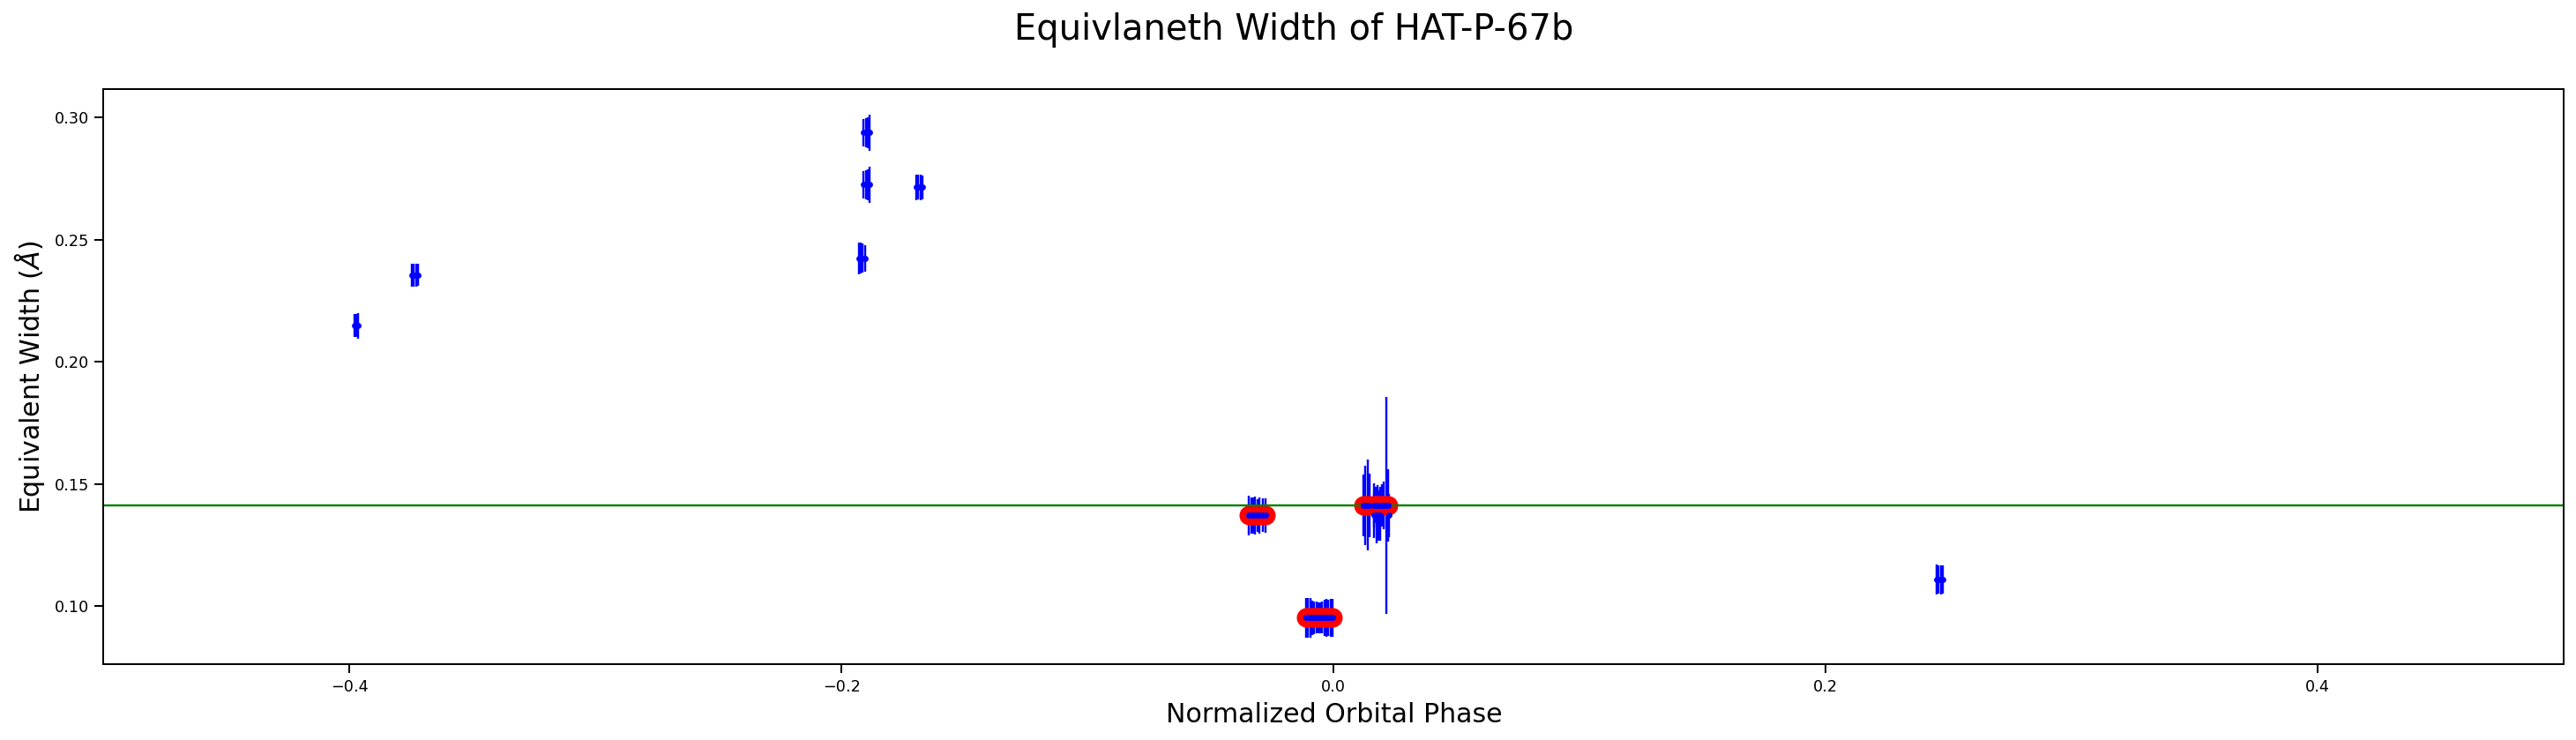

In [94]:
plt.figure(figsize=(25,6))

plt.errorbar(df.normalized_phase, df.ew, yerr=df.ew_unc, fmt='b.')
plt.plot(df.normalized_phase[in_transit_mask], df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

#plt.errorbar(df.normalized_phase-1, df.ew, yerr=df.ew_unc, fmt='b.')
#plt.plot(df.normalized_phase[in_transit_mask]-1, df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

#plt.errorbar(df.normalized_phase+1, df.ew, yerr=df.ew_unc, fmt='b.')
#plt.plot(df.normalized_phase[in_transit_mask]+1, df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

#plt.ylim(0.9,1.32)
plt.xlim(-.5,.5)
plt.axhline(x_line,color = 'green')
plt.suptitle(f'Equivlaneth Width of {target_name}', fontsize=20)
plt.xlabel('Normalized Orbital Phase', fontsize=15)
plt.ylabel('Equivalent Width ($\AA$)', fontsize=15)
#plt.savefig(f'../figures/{target_name}.jpg')

Text(0, 0.5, 'Equivalent Width ($\\AA$)')

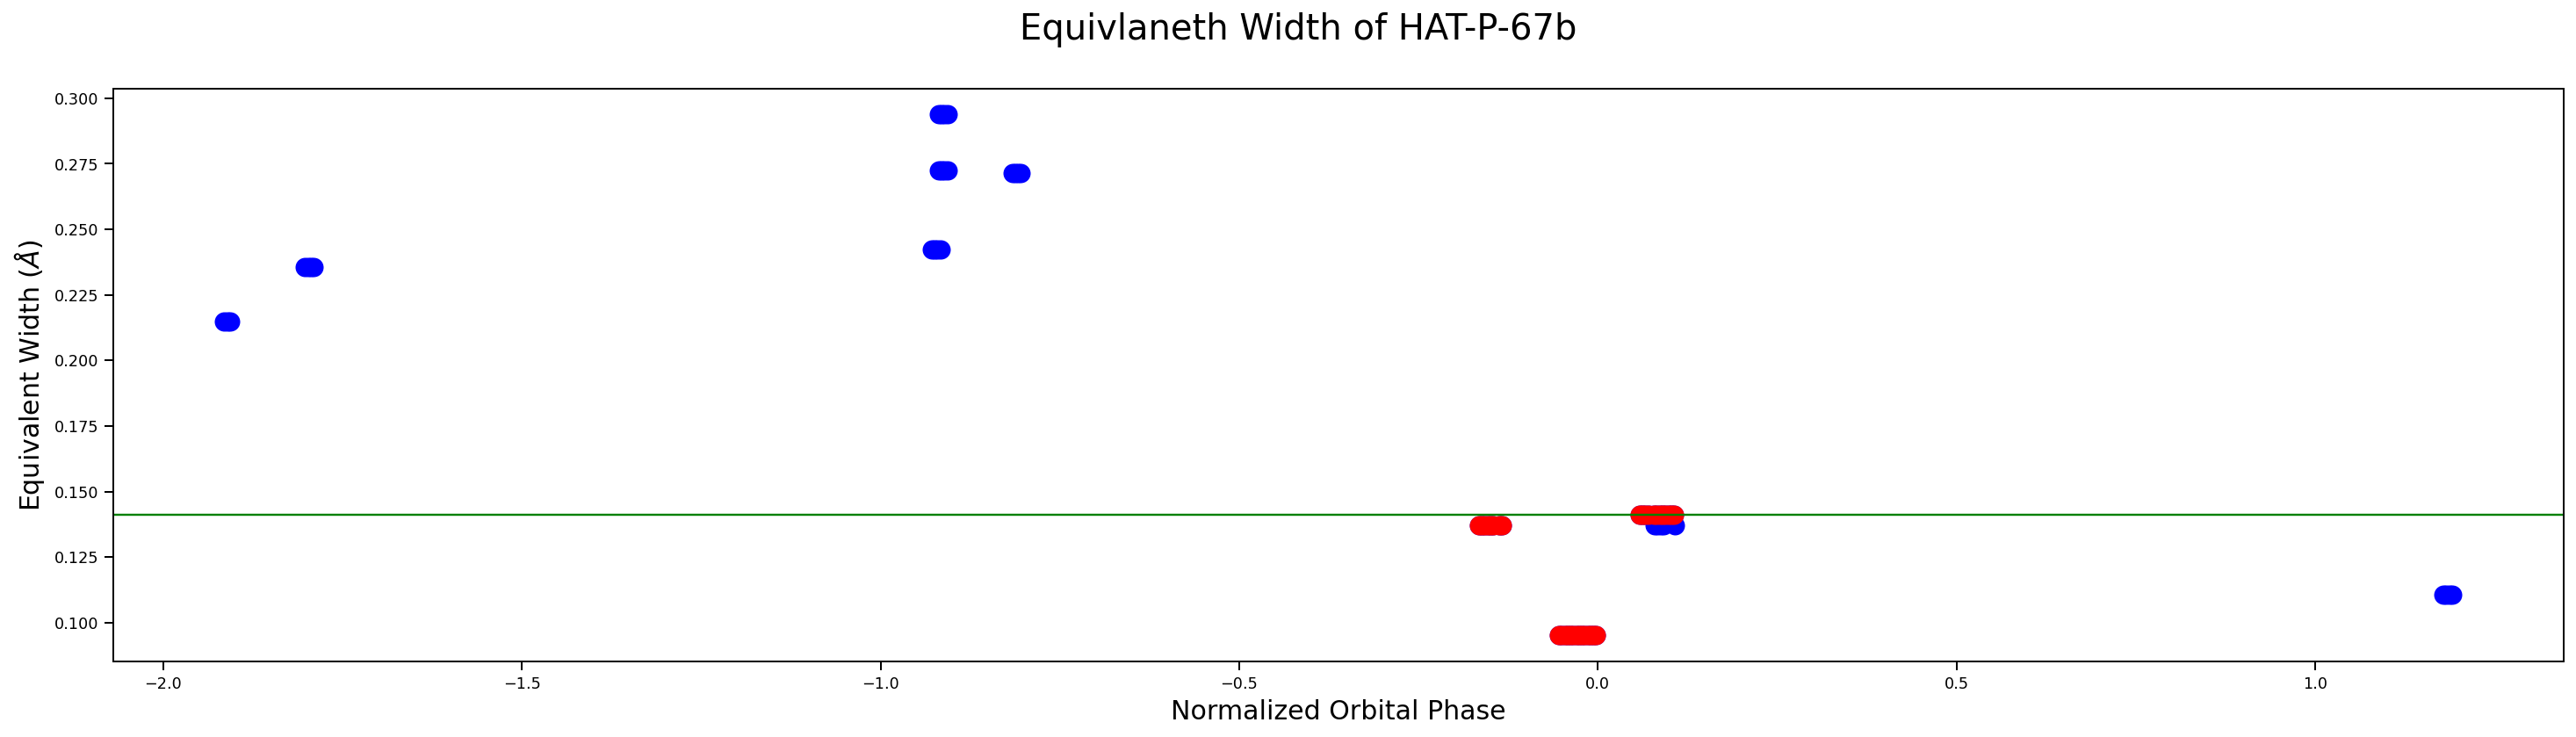

In [95]:
plt.figure(figsize=(25,6))

plt.plot(df.phase, df.ew, 'bo', markersize=10)
plt.plot(df.phase[in_transit_mask], df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

#plt.plot(df.normalized_phase-1, df.ew, 'bo', markersize=10)
#plt.plot(df.normalized_phase[in_transit_mask]-1, df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

#plt.plot(df.normalized_phase+1, df.ew, 'bo', markersize=10)
#plt.plot(df.normalized_phase[in_transit_mask]+1, df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

#plt.ylim(0.9,1.32)
#plt.xlim(-2,2)
plt.axhline(x_line,color = 'green')
plt.suptitle(f'Equivlaneth Width of {target_name}', fontsize=20)
plt.xlabel('Normalized Orbital Phase', fontsize=15)
plt.ylabel('Equivalent Width ($\AA$)', fontsize=15)
#plt.savefig(f'../figures/{target_name}.jpg')

Let's define a variable called 'shifted' in two steps.

In [96]:
second_half_mask = df.normalized_phase > 0.5
first_half_mask = ~second_half_mask

In [97]:
df['shifted']=df.normalized_phase
df.shifted[second_half_mask]=df.shifted[second_half_mask]-1
df.shifted[second_half_mask]

Series([], Name: shifted, dtype: float64)

Text(0, 0.5, 'Equivalent Width ($\\AA$)')

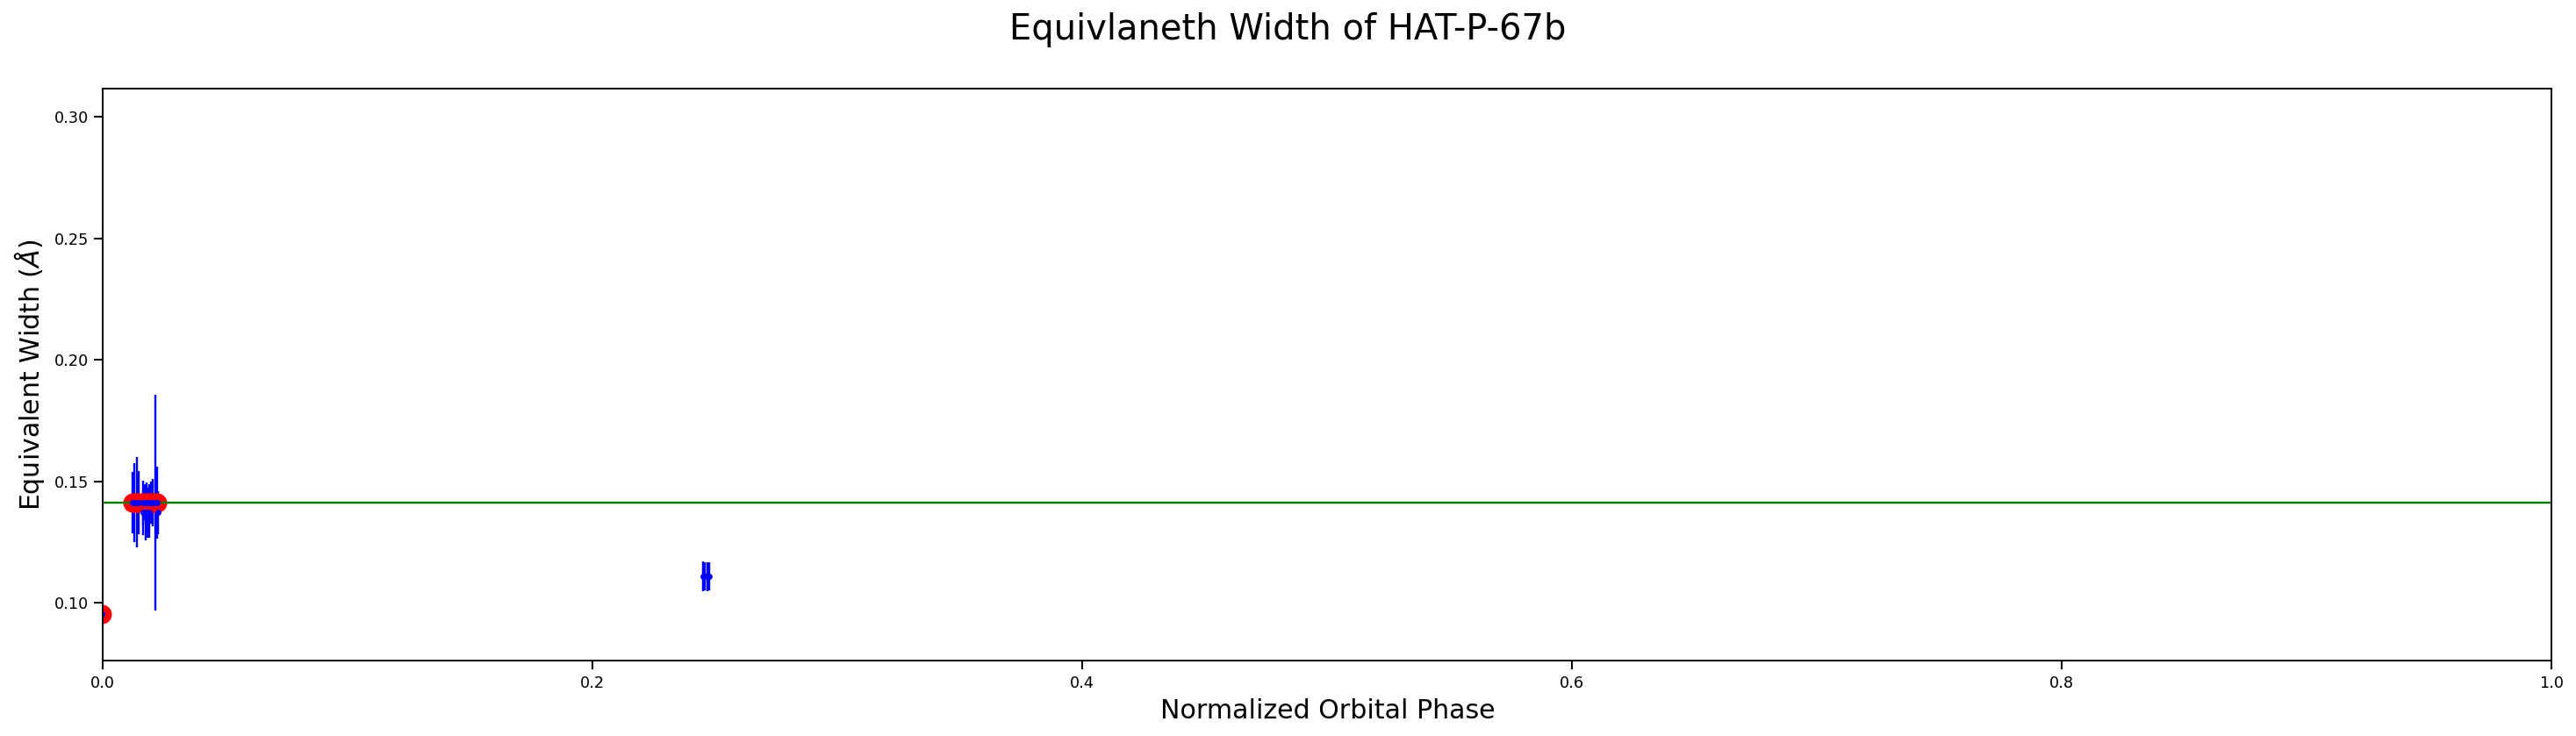

In [98]:
plt.figure(figsize=(25,6))
plt.errorbar(df.shifted, df.ew, yerr=df.ew_unc, fmt='b.')
plt.plot(df.shifted[in_transit_mask], df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time
#plt.ylim(0.9,1.32)
plt.xlim(0,1)
plt.axhline(x_line,color = 'green')
plt.suptitle(f'Equivlaneth Width of {target_name}', fontsize=20)
plt.xlabel('Normalized Orbital Phase', fontsize=15)
plt.ylabel('Equivalent Width ($\AA$)', fontsize=15)
#plt.savefig(f'../figures/{target_name}.jpg')

# Light curve analysis with TESS

In [99]:
sr = lk.search_lightcurve(target_name)
lc_raw = sr[3].download()
lc_raw_2 = sr[0].download()

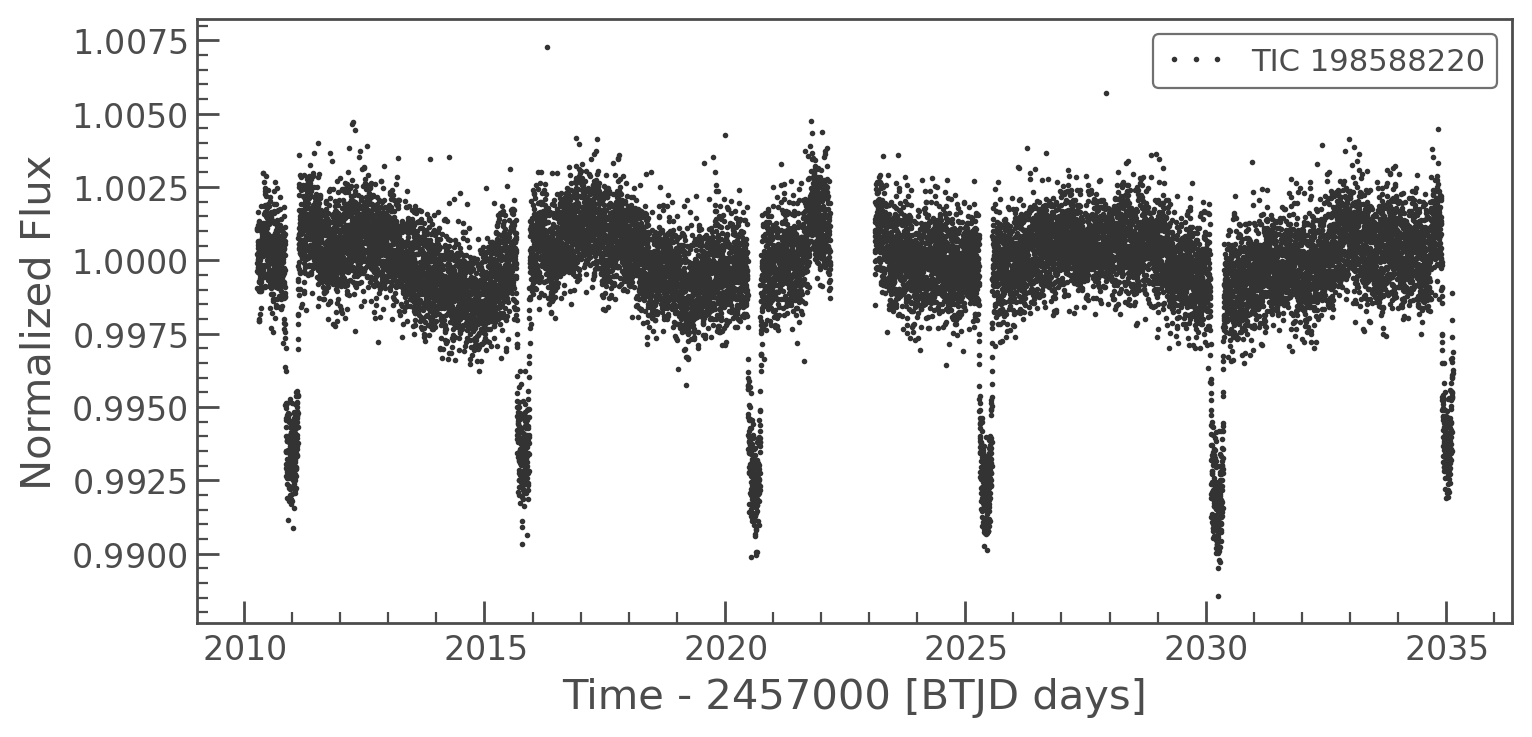

In [100]:
ax = lc_raw.normalize().plot(marker='.', linestyle='none')
#ax.set_ylim(0, 1.05)

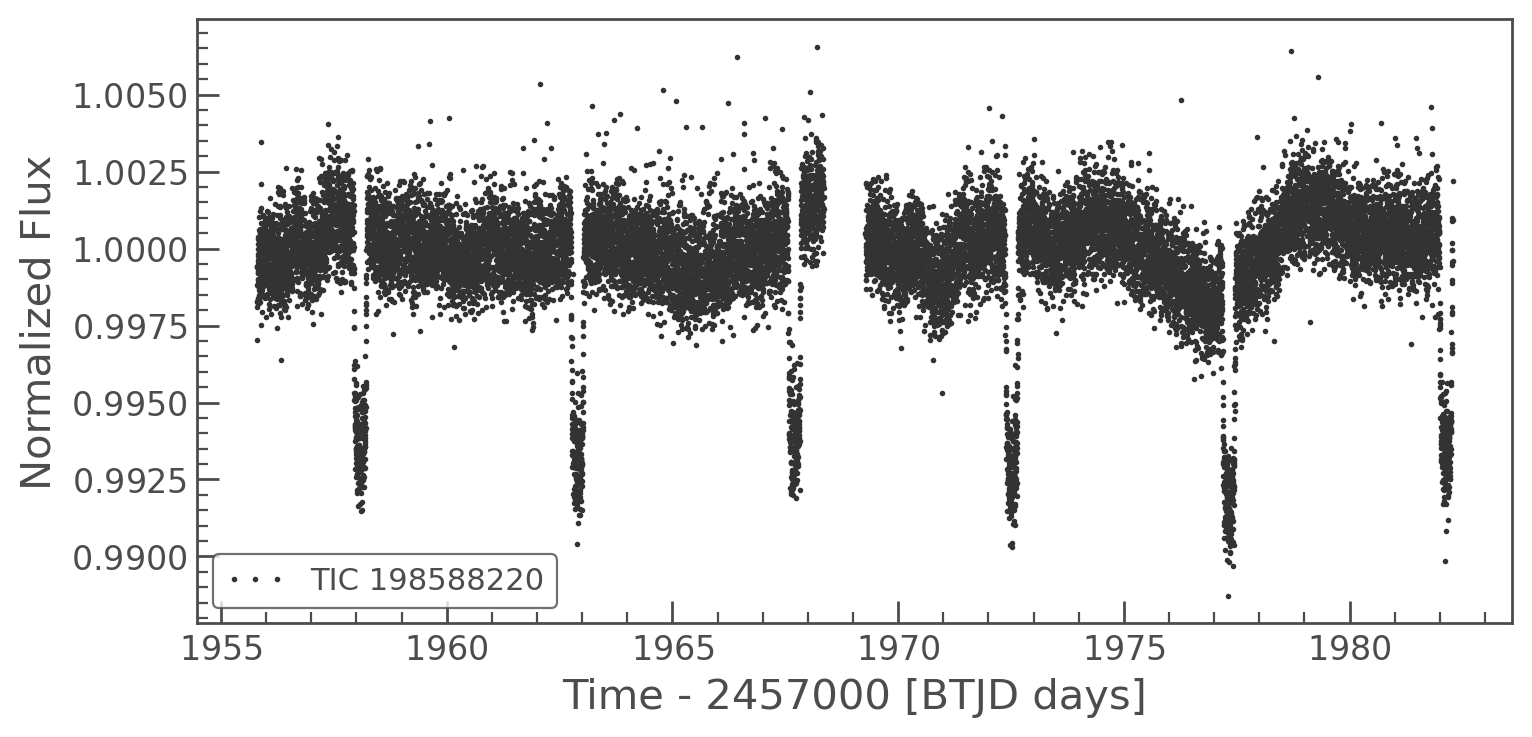

In [101]:
ax = lc_raw_2.normalize().plot(marker='.', linestyle='none')

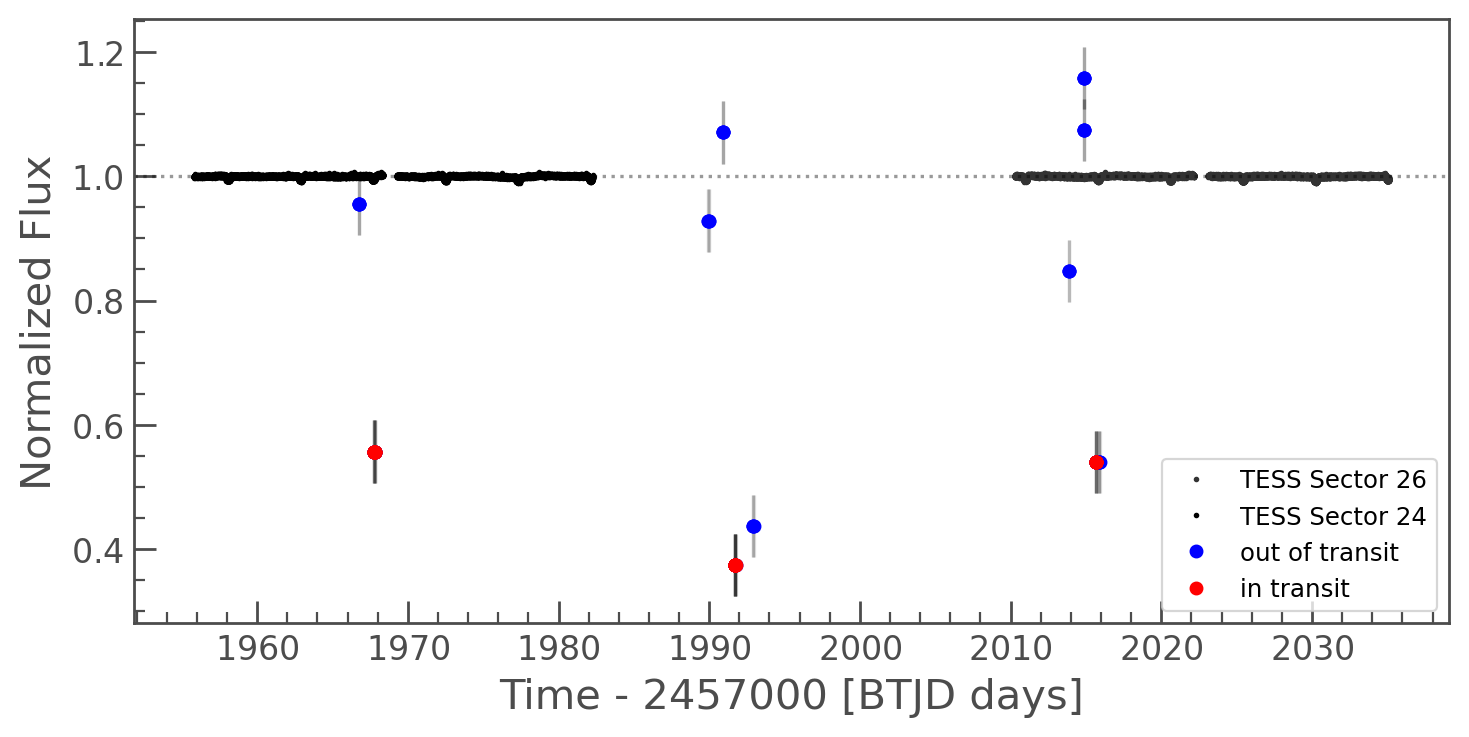

In [119]:
ax = lc_raw.normalize().plot(marker='.', linestyle='none',label='TESS Sector 26')
lc_raw_2.normalize().plot(ax=ax, marker='.', linestyle='none',label='TESS Sector 24',color='k')
ax.plot(df.btjd, df.ew/np.mean(df.ew)/1.5, 'bo', markersize=4, label = 'out of transit')
ax.plot(df.btjd[in_transit_mask], df.ew[in_transit_mask]/np.mean(df.ew)/1.5, 'ro', markersize=4, label = 'in transit')
ax.errorbar(df.btjd, df.ew/np.mean(df.ew)/1.5, yerr=0.05,linestyle='none',color='k',alpha=0.1)
ax.axhline(1.0,linestyle='dotted',color='k',alpha=0.4)
#ax.title('HPF') #hpf he and tess title
#ax.set_xlim(1965,1970)
plt.legend()
#ax.set_ylim(0, 1.05)

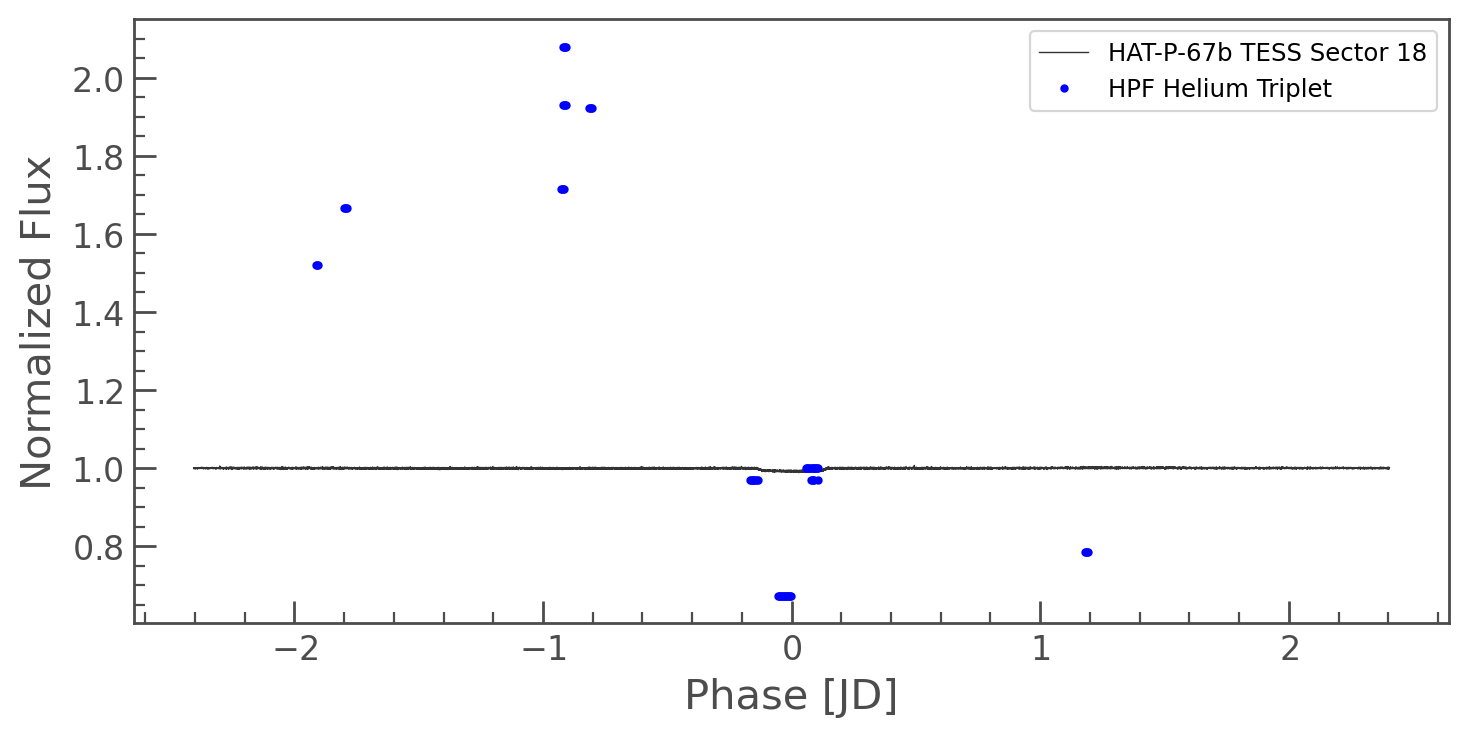

In [107]:
lc_folded = lc_raw.fold(period=orbital_period, epoch_time=t_c_btjd).normalize()
ax = lc_folded.plot(label = target_name+' TESS Sector ')
plt.plot(df.phase, df.ew/np.median(df.ew), 'bo', markersize=2, label = 'HPF Helium Triplet')
plt.legend()
#plt.xlim(-.5,.5)
#plt.ylim(0)
#plt.savefig(f'../figures/TESS_EW_{target_name}_1.jpg')

In [54]:
sr

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 24,2020,SPOC,120,198588220,0.0
1,TESS Sector 24,2020,TESS-SPOC,1800,198588220,0.0
2,TESS Sector 24,2020,QLP,1800,198588220,0.0
3,TESS Sector 26,2020,SPOC,120,198588220,0.0
4,TESS Sector 26,2020,TESS-SPOC,1800,198588220,0.0
5,TESS Sector 26,2020,QLP,1800,198588220,0.0


# Exploring different exposure times in the same sector

In [34]:
sr = lk.search_lightcurve(target_name)
lc_raw = sr[0].download()

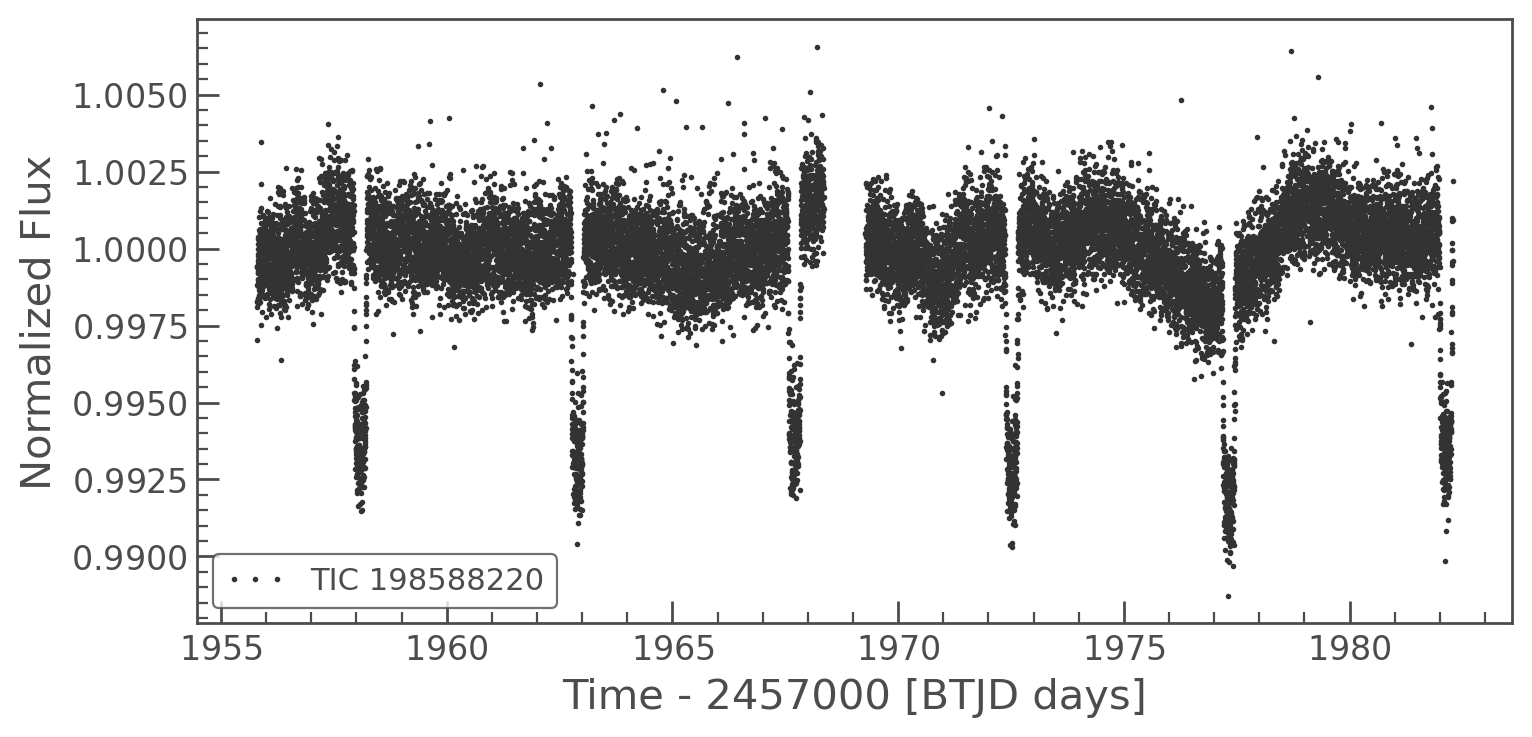

In [35]:
ax = lc_raw.normalize().plot(marker='.', linestyle='none')
#ax.set_ylim(0, 1.05)

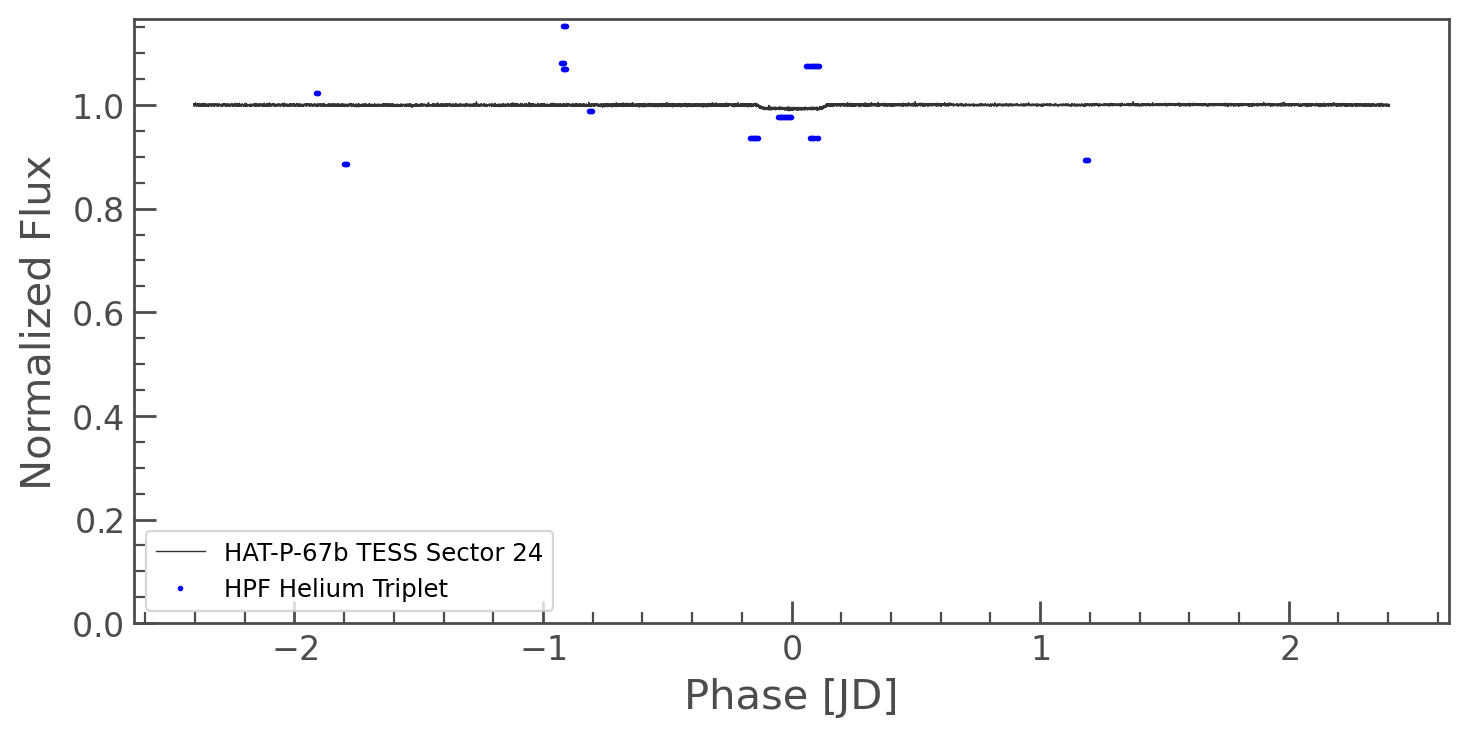

In [39]:
lc_folded = lc_raw.fold(period=orbital_period, epoch_time=t_c_btjd).normalize()
ax = lc_folded.plot(label = target_name+' TESS Sector 24')
plt.plot(df.phase, df.ew/np.mean(df.ew), 'bo', markersize=1, label = 'HPF Helium Triplet')
plt.ylim(0)
plt.legend()
#plt.savefig(f'../figures/TESS_EW_{target_name}_0.jpg')
#ew bc of MCMC has very large error bars and gives us a noisy plot